<a href="https://colab.research.google.com/github/ravi-kr/DeepLearning/blob/master/MulticlassClassification_CNN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# mnist (benchmark) dataset

# It is a dataset of handwritten images

# http://yann.lecun.com/exdb/mnist/


# The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, 
# and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been
# size-normalized and centered in a fixed-size image.

# It is a good database for people who want to try learning techniques and pattern recognition methods on real-world 
# data while spending minimal efforts on preprocessing and formatting.'''


In [2]:
!pip install keras

In [4]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


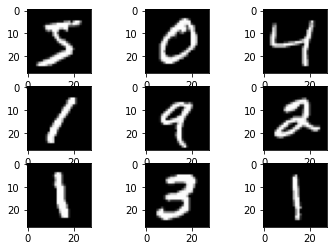

In [6]:
# Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
img_rows, img_cols = 28, 28
  
if k.image_data_format() == 'channels_first': 
  #reshape dataset to have a single channel
   X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
   X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
  #reshape dataset to have a single channel
   X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
   X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

In [0]:
#convert from integers to floats
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

# Nor. 0 to 1
X_train /= 255
X_test /= 255

In [0]:
# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

In [0]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
# To prevent overfitting 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6) 

In [11]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=12, batch_size=500) 

Epoch 1/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.7379 - accuracy: 0.7710
Epoch 2/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.2238 - accuracy: 0.9367
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.1389 - accuracy: 0.9606
Epoch 4/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.1032 - accuracy: 0.9698
Epoch 5/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0830 - accuracy: 0.9758
Epoch 6/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0692 - accuracy: 0.9798
Epoch 7/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0615 - accuracy: 0.9818
Epoch 8/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0541 - accuracy: 0.9838
Epoch 9/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0489 - accuracy: 0.9857
Epoch 10/12
60000/60000 [============================

In [12]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])


loss= 0.027749264302104712
accuracy= 0.9904000163078308


In [13]:
#sinle Value predication in number
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[2])))


1


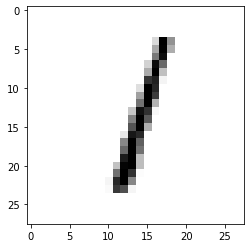

In [14]:
#single Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(X_test[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


In [15]:
# Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.


'''Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot '''

# for further assistance https://www.kaggle.com/zalando-research/fashionmnist


'Labels\n\nEach training and test example is assigned to one of the following labels:\n\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot '

In [16]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_y), (test_X,test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


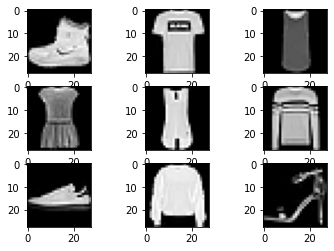

In [17]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
# reshape dataset to have a single channel
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

##convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

#Normalize 0 to 1
train_X = train_X / 255
test_X = test_X / 255

# convert to one hot encoder (vector)
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)


In [0]:

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [20]:
model.fit(train_X, train_y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.4684 - accuracy: 0.8307
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.3162 - accuracy: 0.8863
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.2775 - accuracy: 0.8978
Epoch 4/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.2484 - accuracy: 0.9103
Epoch 5/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.2294 - accuracy: 0.9163


In [21]:
test_loss, test_acc = model.evaluate(test_X, test_y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)



10000/10000 [==============================] - 1s 121us/step
Test loss 0.2846980321526527
Test accuracy 0.899399995803833


In [22]:
#sinle Value predication in number (category)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

2


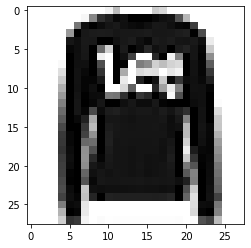

In [23]:
#sinle Value predication in graph (plot)
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()